# Uge 9a: Kurve- og fladeintegraler af skalære funktioner

Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from dtumathtools import*
init_printing()
x,y,z = symbols('x y z', real=True)

## Kurvelængder

Vi får givet en parameter-kurve,

In [2]:
u,v = symbols('u v', real=True)
r = Matrix([sin(u), sin(u)*cos(u)])
r

⎡   sin(u)    ⎤
⎢             ⎥
⎣sin(u)⋅cos(u)⎦

hvor $u \in [0, 2\pi]$

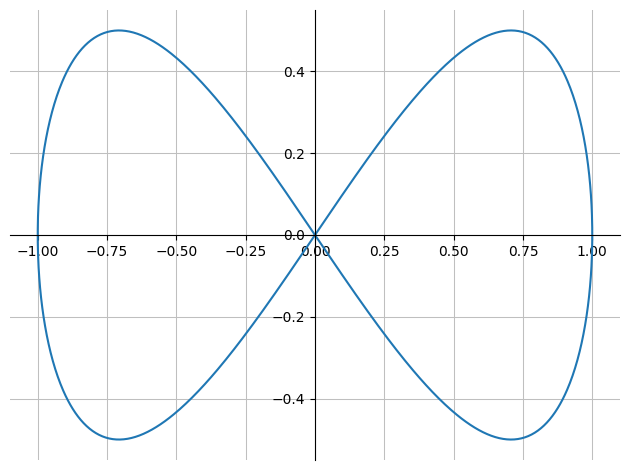

In [3]:
p_kurve = dtuplot.plot_parametric(*r, (u,0,2*pi), use_cm=False, label="r(u)",axis_center="auto")

### Tangentvektor og tangent

Vi finder tangentvektoren,

In [4]:
dr = r.diff(u)
dr

⎡      cos(u)       ⎤
⎢                   ⎥
⎢     2         2   ⎥
⎣- sin (u) + cos (u)⎦

Vi finder nu parameterfremstillingen for tangenten svarende til kurvepunktet $r(\pi/3)$,

In [5]:
t = symbols("t")
r_tan = r.subs(u,pi/3) + t*dr.subs(u,pi/3)
r_tan

⎡ t   √3 ⎤
⎢ ─ + ── ⎥
⎢ 2   2  ⎥
⎢        ⎥
⎢  t   √3⎥
⎢- ─ + ──⎥
⎣  2   4 ⎦

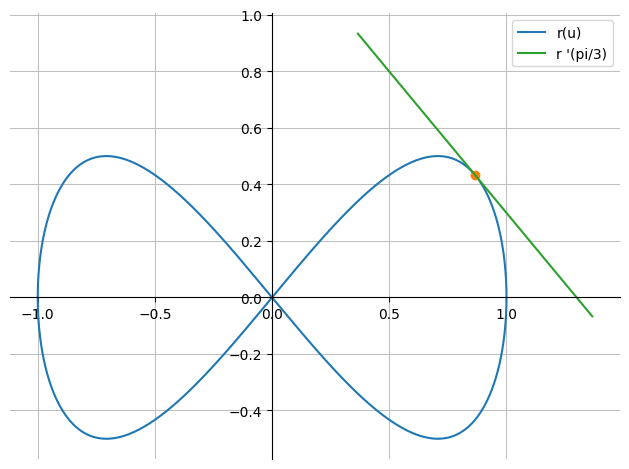

In [6]:
p_point = dtuplot.scatter(r.subs(u,pi/3), show=False)
p_tan = dtuplot.plot_parametric(*r_tan, (t,-1,1), use_cm=False, label="r '(pi/3)", show=False)


(p_kurve + p_point + p_tan).show()

### Længden af kurven

Og så kan længden af denne kurve findes ved

\begin{equation*}
  \int_K\; \mathrm{d}\pmb{s} = \int_{0}^{2\pi} \Vert r'(u) \Vert \mathrm{d}u
\end{equation*}

In [7]:
jacobiant = dtutools.l2_norm(dr)
integrate(jacobiant, (u,0,2*pi)).n()

## Kurveintegral i rummet

Vi får givet en funktion:

In [8]:
x,y,z = symbols("x y z")
f = lambda x,y,z: sqrt(x**2 + y**2 + z**2)
f(x,y,z)

og en parameterkurve

In [9]:
r = Matrix([u*cos(u), u*sin(u), u])
r

⎡u⋅cos(u)⎤
⎢        ⎥
⎢u⋅sin(u)⎥
⎢        ⎥
⎣   u    ⎦

for $u\in[0,5]$.

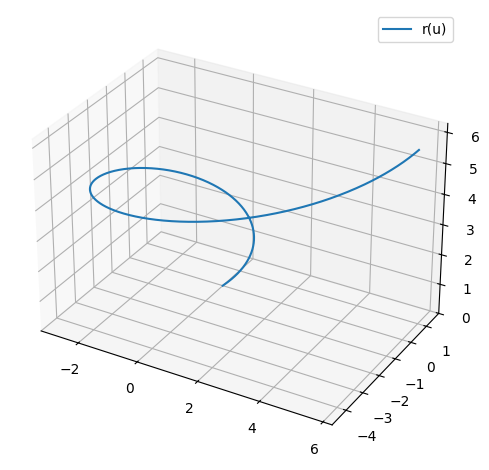

In [10]:
p_rumkurve = dtuplot.plot3d_parametric_line(*r, (u,0,2*pi), use_cm=False, label="r(u)",aspect="equal", legend=True)

Restriktionen af funktionen til kurven er:

In [11]:
begrænsning = f(*r).simplify()
begrænsning

og hvis man husker at $u$ er positiv, da vi har defineret $u\in [0, 5]$, er absolutværdien irrelevant. Vi har dog, ved definitionen af vores `u` og `v`, defineret dem ved

```python
u,v = symbols('u v', real=True)
```

hvor SymPy kun tager højde for at $u=|u|$ i lige præcis det her tilfælde, hvis vi havde defineret dem ved

```python
u,v = symbols('u v', real=True, nonnegative=True)
```

i stedet kan vi nu bruge $\verb|refine()|$ og $\verb|Q.|\textit{assumption}\verb|(symbol)|$, hvor _assumption_ kan skiftes ud med prædikaterne i [denne tabel](https://docs.sympy.org/latest/guides/assumptions.html#id28). 

Vi skal her bruge $\verb|Q.nonnegative()|$, og så viser SymPy at **begrænsningen** faktisk er

In [12]:
ægte_begrænsning = refine(begrænsning, Q.nonnegative(u)) # Q.nonnegative(u) fortæller refine() at u >= 0
ægte_begrænsning

for $u \in [0,5]$. Hvorvidt der står $u$ eller $|u|$ i udtrykket, kan nogen gange gøre forskellen hvis SymPy prøver integrerer det

Tilbage til kurveintegralet vi ønsker at bestemme: $\int_K f(x,y,z)\, \mathrm{d}\pmb{s}$.

Først finder vi tangentvektoren,

In [13]:
dr = r.diff(u)
dr

⎡-u⋅sin(u) + cos(u)⎤
⎢                  ⎥
⎢u⋅cos(u) + sin(u) ⎥
⎢                  ⎥
⎣        1         ⎦

Længden af tangentvektoren $||r_u'(u)||$ er lig med jacobianten,

In [14]:
jacobiant = dtutools.l2_norm(dr).simplify()

# Følgende linje virker kun hvis $u$ er en reel variabel
# altså hvis 'u = symbols('u', real=True)'
# jacobi = dr.norm()

jacobiant

Vi kan nu finde **integralet langs kurven**,

In [15]:
integrate( f(*r) * jacobiant ,(u,0,5)).evalf()

og **kurvens længde**,

In [16]:
integrate(jacobiant,(u,0,5)).evalf()

## Integral over cylinderflade i $\mathbb{R}^3$

Vi betragter en funktion $f: \mathbb{R}^3 \to \mathbb{R}$ givet ved

\begin{equation*}
f(x,y,z) = 8 z
\end{equation*}

Vi betragter også en flade givet ved følgende parameterfremstilling med $u \in [0,\frac{\pi}{2}]$ og $v \in [0,1]$

In [17]:
# Denne gang husker vi 'nonnegative=True', da vi igen ser at
# ingen af intervallerne for u og v indeholder negative tal
u,v = symbols('u v', real=True, nonnegative=True)
r = Matrix([u*cos(u),u*sin(u),u*v])

def f(x,y,z):
    return 8*z

r, f(x,y,z)

⎛⎡u⋅cos(u)⎤     ⎞
⎜⎢        ⎥     ⎟
⎜⎢u⋅sin(u)⎥, 8⋅z⎟
⎜⎢        ⎥     ⎟
⎝⎣  u⋅v   ⎦     ⎠

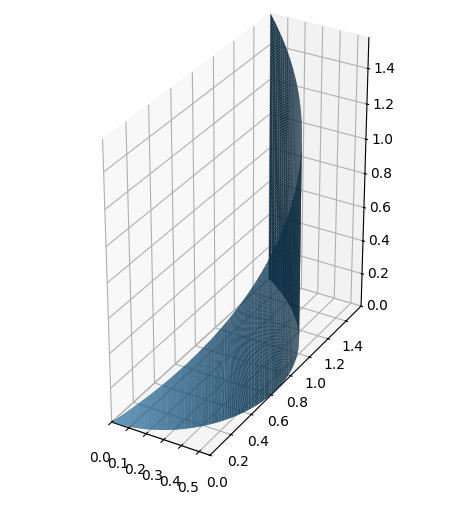

In [18]:
dtuplot.plot3d_parametric_surface(*r,(u,0,pi/2),(v,0,1), aspect='equal')

<!--
### _Sidenote: Interaktive 3D-plots_

+++

**OBS:** Dette behøves ikke. Personligt synes vi dog at det er rart at kunne vende og dreje 3D-plots, og få et bedre overblik over hvad der sker i plottet.

**OBS 2:** Derudover skal man være opmærksom på at ens notebook ikke kan eksporteres til PDF, hvis man har plot af denne type med. Det kan dog omgås, men overvej om du gider at bruge tid på at finde ud af det.

Vil man gerne kunne bevæge et 3D-plot, for få en bedre fornemmelse er det en mulighed at bruge en anden `backend` når man plotter. Det kræver dog at man installere pakken `plotly` med pip:

```
conda install plotly
```

Eller ved at udkommentere cellen nedenfor og eksekvere den en enkelt gang, så bliver plotly installeret i den version af Python din notebook bruger lige nu.

```{code-cell} ipython3
# ! conda install plotly
```

```{code-cell} ipython3
#                                                                           vvvvvvvvvvvvvvvvvv  her
# dtuplot.plot3d_parametric_surface(*r,(u,0,pi/2),(v,0,1), aspect='equal', backend=dtuplot.PB, use_cm=True)
```
-->

### Jacobianten for en flade i 3D

Vi finder jacobianten og indsætter parameterfremstillingen i $f$

In [19]:
kryds = r.diff(u).cross(r.diff(v))
jacobianten = sqrt((kryds.T * kryds)[0]).simplify()
jacobianten

In [20]:
integrand = f(*r) * jacobianten
integrand

In [21]:
integrate(integrand,(v,0,1),(u,0,pi/2)).evalf()